# Classification MNIST avec Réseaux de Neurones

Dans ce notebook, nous allons explorer trois méthodes pour implémenter un réseau de neurones simple pour classifier le dataset MNIST. Nous utiliserons :
- **Keras/TensorFlow** pour une approche simple et intuitive

Le dataset MNIST est un ensemble de données classique utilisé pour entraîner et tester les modèles de classification d'images. Il contient 60 000 images d'entraînement et 10 000 images de test de chiffres manuscrits (0 à 9).

In [ ]:
! pip install --upgrade pip
! pip install tensorflow[and-cuda]
! pip install matplotlib
! pip install torch
! pip install pydot

In [ ]:
# Pour Keras/TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras

# Pour la visualisation
import matplotlib.pyplot as plt

# Lecture image
from PIL import Image

import numpy as np

### Keras/TensorFlow

In [ ]:
# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("X_train scalar: ", X_train.shape)

# -1 autoadaptation au nombre d'image (60_000) / dans ce cas on peut remplacer par 60_000
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(?,?,?,?)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("X_train vector: ", X_train.shape)
print("y_train vector: ", y_train.shape)

In [ ]:
# Normalisatoin des images

print("Avant normalisation : min={}, max={}".format(X_train.min(),X_train.max()))

xmax = X_train.max()
X_train = X_train/xmax
X_test = X_test/xmax

print("Après normalisation : min={}, max={}".format(X_train.min(),X_train.max()))

In [ ]:
# Visualisation des exemples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

Maxpooling2D

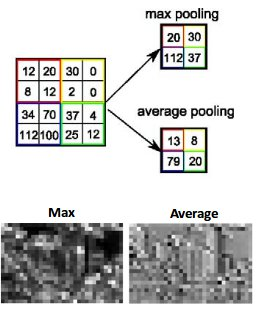

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Input((28,28,1)))

# 8 kernel de 3x3
model.add(keras.layers.Conv2D(???,(???,???), activation=????))
# Reduction avec maxpooling
model.add(keras.????.MaxPooling2D((2,2)))
# Débranche 20% des neuronnes à chaques itération (pas de mise à jour de leur poids)
model.add(keras.layers.Dropout(0.2))

# 16 kernel de 3x3
# 8 plans convolutifs de 13x13 (28-3+1 = 26, 26/2 = 13)
model.add(keras.????.????(???,(??,??), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

# 11 plans conv de 5x5 (13-3+1 = 11, 11/2 = 13)
# Fin des convolutions (5x5 trop petit)
# Applatissement
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# 10 classes de sorties potentiels
model.add(keras.layers.Dense(???, activation=????))

![text](https://www.google.com/imgres?q%3Dsoftmax%20formula%26imgurl%3Dhttps%3A%2F%2Fdocs-assets.developer.apple.com%2Fpublished%2Fc2185dfdcf%2F0ab139bc-3ff6-49d2-8b36-dcc98ef31102.png%26imgrefurl%3Dhttps%3A%2F%2Fdeveloper.apple.com%2Fdocumentation%2Faccelerate%2Fbnnsactivationfunction%2F2915301-softmax%26docid%3DuDhz1PgCDbA_XM%26tbnid%3DYCa9y01Aqck4ZM%26vet%3D12ahUKEwi865bxyKmIAxW_TaQEHYb3HJwQM3oECGUQAA..i%26w%3D640%26h%3D273%26hcb%3D2%26ved%3D2ahUKEwi865bxyKmIAxW_TaQEHYb3HJwQM3oECGUQAA)

Comment choisir les paramètres (20%, 100 neurones, etc ...)
- Tester !
- Lire la litérature sur ce qui fonctionne le mieu !

In [ ]:
model.summary()

In [ ]:
# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entraînement
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=16, batch_size=512)

batch_size=512
epochs=16
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_test, y_test))

In [ ]:
# Évaluation sur les données de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

In [ ]:
image_path = "sample_image.png"
image = Image.open(image_path)
image = image.resize((28,28))
image = image.convert('L')
image_array = np.array(image) / 255.0

image_array = np.expand_dims(image_array, axis=0)
image_array = np.expand_dims(image_array, axis=-1)

prediction = model.predict(image_array)
predicted_label = np.argmax(prediction, axis=1)
print(f'Le modèle prédit: {predicted_label[0]}')

In [ ]:
image_path = "sample_image.png"
image = Image.open(image_path)
image = image.resize((28,28))
image = image.rotate(180)
image = image.convert('L')
image_array = np.array(image) / 255.0

image_array = np.expand_dims(image_array, axis=0)
image_array = np.expand_dims(image_array, axis=-1)

prediction = model.predict(image_array)
predicted_label = np.argmax(prediction, axis=1)
print(f'Le modèle prédit: {predicted_label[0]}')

In [ ]:
from tensorflow.keras.utils import plot_model

# Afficher le schéma du modèle et le sauvegarder en tant qu'image
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)